In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from hyperion.model import ModelOutput
import astropy.constants as const
from photutils import aperture_photometry as ap
from photutils import CircularAperture

/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
pc = const.pc.cgs.value

# Inclination angle = 53 deg. with cavity opening angle of 20 deg.

In [5]:
m = ModelOutput('/Volumes/SD-Mac/model77.rtout')
image = m.get_image(group=0, inclination=0, distance=200. * pc, units='MJy/sr')

In [10]:
# The radius of the aperture in arcsec
radius = 10
aper_size = np.pi*radius**2 / 4.25e10 # in sr
# The offset to the center
offset = 20

### IRAC band (3.6, 4.5, 5.8, 8.0 $\mu$m)

In [11]:
irac_wl = [3.6, 4.5, 5.8, 8.0]
irac_wl = [3.6]
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)
for wl in irac_wl:
    iwav = np.argmin(np.abs(wl - image.wav))
    # Image in the unit of MJy/sr, change it into erg/s/cm2/Hz/sr
    factor = 1e-23*1e6
    val = image.val[::-1, :, iwav] * factor + 1e-30
    
    # Calculate the image width in arcseconds given the distance used above
    # get the max radius
    rmax = max(m.get_quantities().r_wall)
    w = np.degrees(rmax / image.distance) * 3600.
    
    pos_n = (len(val[0,:])/2.-1,len(val[0,:])/2.-1 + offset*len(val[0,:])/2/w)
    pos_s = (len(val[0,:])/2.-1,len(val[0,:])/2.-1 - offset*len(val[0,:])/2/w)
    
    aper_n = CircularAperture(pos_n, r=radius * len(val[0,:])/2/w )
    aper_s = CircularAperture(pos_s, r=radius * len(val[0,:])/2/w )
    # multiply the aperture size in sr and convert to Jy
    phot_n = ap(val, aper_n)['aperture_sum'].data * aper_size * 1e23
    phot_s = ap(val, aper_s)['aperture_sum'].data * aper_size * 1e23
    print phot_n, phot_s, phot_s/phot_n

[ 955.57157128] [ 3198.47443199] [ 3.34718458]


# Inclination angle = 84 deg. with cavity opening angle of 15 deg.

In [16]:
m = ModelOutput('/Users/yaolun/bhr71/hyperion/controlled/model2.rtout')
image = m.get_image(group=0, inclination=0, distance=200. * pc, units='MJy/sr')

In [17]:
# The radius of the aperture in arcsec
radius = 10
aper_size = np.pi*radius**2 / 4.25e10 # in sr
# The offset to the center
offset = 10

### IRAC band (3.6, 4.5, 5.8, 8.0 $\mu$m)

In [18]:
irac_wl = [3.6, 4.5, 5.8, 8.0]
irac_wl = [3.6]
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111)
for wl in irac_wl:
    iwav = np.argmin(np.abs(wl - image.wav))
    # Image in the unit of MJy/sr, change it into erg/s/cm2/Hz/sr
    factor = 1e-23*1e6
    val = image.val[::-1, :, iwav] * factor + 1e-30
    
    # Calculate the image width in arcseconds given the distance used above
    # get the max radius
    rmax = max(m.get_quantities().r_wall)
    w = np.degrees(rmax / image.distance) * 3600.
    
    pos_n = (len(val[0,:])/2.-1,len(val[0,:])/2.-1 + offset*len(val[0,:])/2/w)
    pos_s = (len(val[0,:])/2.-1,len(val[0,:])/2.-1 - offset*len(val[0,:])/2/w)
    
    aper_n = CircularAperture(pos_n, r=radius * len(val[0,:])/2/w )
    aper_s = CircularAperture(pos_s, r=radius * len(val[0,:])/2/w )
    # multiply the aperture size in sr and convert to Jy
    phot_n = ap(val, aper_n)['aperture_sum'].data * aper_size * 1e23
    phot_s = ap(val, aper_s)['aperture_sum'].data * aper_size * 1e23
    print phot_n, phot_s, phot_s/phot_n

[ 672.30118254] [ 958.12378779] [ 1.42514071]


## Spitzer IRAC1 image

In [ ]:
# source
#   data_file:		/Users/yaolun/bhr71/data/photometry/DC297.7-2.8_COMB_IRAC1_mosaic.fits
#   arcsec/pixel:	1.22334
# background
#   constant_value:	0.000000
# column units
#   area:		arcsec**2
#   surf_bri:		cnts/arcsec**2
#   surf_err:		cnts/arcsec**2

# background-subtracted results
 reg   net_counts     error   background    berror      area  surf_bri  surf_err
---- ------------ --------- ------------ --------- --------- --------- ---------
   S     1401.385    37.435        0.000     0.000    309.79     4.524     0.121
   N      100.229    10.011        0.000     0.000    311.29     0.322     0.032


# source_region(s):
# physical;point(641.15757,364.76601);circle(632.99779,364.27833,8.1743409);circle(649.31735,365.2537,8.1743409);line(604.62624,362.58264,676.10592,366.85478)

# source_data
 reg       counts    pixels
---- ------------ ---------
   S     1401.385       207
   N      100.229       208

In [44]:
irac1_data = np.array([1401.385, 100.229]) * 1e6 * aper_size
print irac1_data, irac1_data[0]/irac1_data[1]

[ 10.3590137    0.74089104] 13.9818316056


## With offseting 10 arcsec from the center

In [13]:
print 30978.005/15650.630

1.97934555989


## Irregular aperture

In [14]:
print 8984.047/3179.059

2.82600826219


# Try to remove point sources in the image

In [23]:
from astropy.io import fits
hdu = fits.open('/Users/yaolun/Desktop/IRAC1_crop.fits')

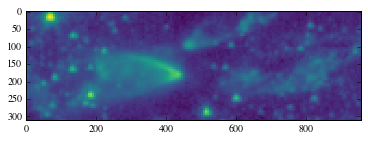

In [24]:
plt.imshow(np.log10(hdu[0].data), cmap='viridis')

(0, 100)

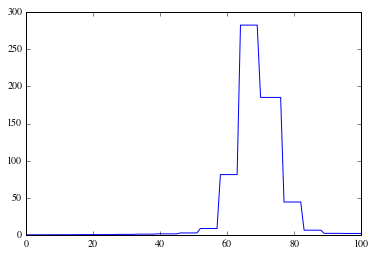

In [80]:
plt.plot(hdu[0].data[19,:])
plt.xlim([0,100])

In [81]:
im = hdu[0].data
import photutils  as phot
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(im, sigma=3.0, iters=5)
print mean, median, std
daofind = phot.DAOStarFinder(fwhm=20, threshold=20)    
sources = daofind(im - median)

0.526117 0.41775 0.303302


In [82]:
print sources

 id   xcentroid     ycentroid   ...      peak          flux           mag      
--- ------------- ------------- ... ------------- ------------- ---------------
  1 68.4127948489 19.2474961146 ...   281.9112854 69.3097282266   -4.6019854898
  2 134.509957402 71.1653658096 ... 13.3672761917 3.10845764957  -1.23136238701
  3 464.808693494 97.8249371422 ... 7.52162265778 1.66369614902 -0.552685028364
  4  221.59542686  115.25815024 ... 11.8672533035 2.89938836525  -1.15576597956
  5 183.805234247 160.571991649 ... 5.31512451172  1.2836760819 -0.271138623214
  6 132.447850914 165.525624255 ... 13.4876499176 4.38541352613  -1.60502637946
  7 428.794390155 181.791511418 ... 45.4683570862  9.0349653839  -2.38981623242
  8 82.0183515765 189.251062002 ... 10.0352630615 2.62999244397  -1.04988625188
  9 49.7238058488 206.851835363 ... 6.74895524979 1.53987834207 -0.468716027005
 10 183.420881587 239.301137695 ... 75.4901580811 21.1617043186  -3.31387660481
 11 599.203199959  248.30492347 ... 26.8

In [94]:
psf_guess = phot.psf.IntegratedGaussianPRF(flux=1)
psf_guess.flux.fixed = psf_guess.x_0.fixed = psf_guess.y_0.fixed = False
psf_guess.x_0.sigma = True
fitshape = (50,50)

In [95]:
from astropy.table import Table
intab4 = Table(names=['x_0', 'y_0', 'flux_0'], data=[sources['xcentroid'], sources['ycentroid'], sources['flux']])

outtabi = phot.psf.psf_photometry(im, intab4, psf_guess, fitshape, store_fit_info=True)

In [96]:
outtabi

x_0,y_0,flux_0,x_fit,y_fit,flux_fit,fit_messages
,,,,,,
float64,float64,float64,float64,float64,float32,str71
68.4127948489,19.2474961146,69.3097282266,66.3032315036,20.6149424782,3831.98,Number of calls to function has reached maxfev = 100.
134.509957402,71.1653658096,3.10845764957,134.647010865,69.2921929695,187.089,Number of calls to function has reached maxfev = 100.
464.808693494,97.8249371422,1.66369614902,464.96689763,100.568899329,107.354,Number of calls to function has reached maxfev = 100.
221.59542686,115.25815024,2.89938836525,221.909653449,112.279160551,166.509,Number of calls to function has reached maxfev = 100.
183.805234247,160.571991649,1.2836760819,184.602158194,162.831657958,77.7913,Number of calls to function has reached maxfev = 100.
132.447850914,165.525624255,4.38541352613,134.921640266,166.549232961,189.831,Number of calls to function has reached maxfev = 100.
428.794390155,181.791511418,9.0349653839,433.242106873,181.867019252,620.904,Number of calls to function has reached maxfev = 100.
82.0183515765,189.251062002,2.62999244397,79.4177514628,187.552856364,141.99,Number of calls to function has reached maxfev = 100.


In [97]:
subim = phot.psf.subtract_psf(im, psf_guess, outtabi)

/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


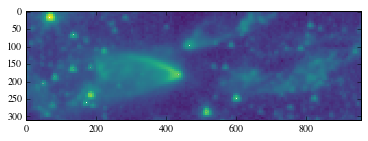

In [98]:
plt.imshow(np.log10(subim), cmap='viridis')

In [19]:
hdu[0].data = subim
hdu.writeto('IRAC1_subtracted.fits')

### ds9 regions extraction

polygon shape - all south lobe included

In [20]:
print '2648.47 / 826.174 = ', 2648.47 / 826.174

2648.47 / 826.174 =  3.20570485152


<img src='poly1.jpg'>

polygon shape - south lobe offset by 5 arcsec

In [21]:
print '2086.431 / 826.174 = ', 2086.431 / 826.174

2086.431 / 826.174 =  2.52541353274


<img src='poly2.jpg'>

bos shape - 50x30, no offset

In [22]:
print '3078.547 / 634.928 = ', 3078.547 / 634.928

3078.547 / 634.928 =  4.8486552806


<img src='box1.jpg'>

circle shape - 10" radius, offset 10", was the setup before when I measured a ratio of 14

In [99]:
print '1385.817 / 96.641 = ', 1385.817 / 96.641

1385.817 / 96.641 =  14.3398454072


<img src='circle1.jpg'>